In [29]:
import xarray as xr
import fsspec
import s3fs
import os
import matplotlib.pyplot as plt
import dask
import rasterio
from dask.distributed import Client, LocalCluster, progress
import datetime
import tempfile
import boto3
import geoviews as gv
from geoviews import opts

gv.extension('matplotlib')

gv.output(size=150)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

run conda install -c pyviz geoviews-core dask-ml

In [30]:
env = dict(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR', 
           AWS_NO_SIGN_REQUEST='YES',
           GDAL_MAX_RAW_BLOCK_CACHE_SIZE='200000000',
           GDAL_SWATH_SIZE='200000000',
           VSI_CURL_CACHE_SIZE='200000000')
os.environ.update(env)

In [31]:
def convert_full_date_to_continous_day(year, month, day):
    """
    Helper function if you wish to use month, day vs julian day
    """
    return datetime.datetime(year, month, day).timetuple().tm_yday

def get_geo_uri(year, day):
    """
    returns list of geo uris
    """
    fs = s3fs.S3FileSystem(anon=True)
    files = []
    
    filepath = "s3://noaa-goes17/ABI-L2-FDCC/%s/%s/*/*.nc" % (str(year).zfill(4), str(day).zfill(3)) 
    files = fs.glob(filepath)
    
    if len(files) < 1:
        raise Exception("No files found")
    
    return files

def download_to_xarray(uri):
    """
    Downloads file and directly loads it into xarray in memory
    """
    s3 = boto3.client("s3")
    
    with tempfile.NamedTemporaryFile() as temp_file:
        s3.download_file(Bucket=uri[:11], Key=uri[12:], Filename=temp_file.name)
        datastore = xr.open_dataset(temp_file.name)
        
    return datastore

def download_to_disk(uri):
    s3 = boto3.client("s3")
    filename = uri[12:].replace("/", "-")
    if not os.path.exists(filename):
        s3.download_file(Bucket=uri[:11], Key=uri[12:], Filename=filename)
        
    return filename

In [32]:
#TUBBS = {"year": 2017, "day1":220, "day2":243}
#CAMP = {"year": 2018, "day1":312, "day2":329}
#WOOLSEY = {"year": 2018, "day1":312, "day2":325}

#below are incorrect to deal with data source
CAMP = {"year": 2018, "day1":317, "day2":318}
WOOLSEY = {"year": 2018, "day1":317, "day2":319}

Downloading a single goes file from s3 takes 1.7s so we first download to disk the portions of time we're interested in 

In [33]:
tubbs_uris = []
camp_uris = []
woolsey_uris = []

In [34]:
for i in range(TUBBS["day2"] - TUBBS["day1"]):
    day = i + TUBBS["day1"]
    tubbs_uris += get_geo_uri(TUBBS["year"], day)

NameError: name 'TUBBS' is not defined

In [35]:
for i in range(CAMP["day2"] - CAMP["day1"]):
    day = i + CAMP["day1"]
    camp_uris += get_geo_uri(CAMP["year"], day)

In [36]:
for i in range(WOOLSEY["day2"] - WOOLSEY["day1"]):
    day = i + WOOLSEY["day1"]
    woolsey_uris += get_geo_uri(WOOLSEY["year"], day)

In [37]:
local_filepaths = []

In [38]:
for key in camp_uris:
    local_filepaths.append(download_to_disk(key))
for key in woolsey_uris:
    local_filepaths.append(download_to_disk(key))

KeyboardInterrupt: 

In [40]:
def load_local_file_into_xarray(year, day, hour, localfilepaths):
    """
    Returns an xarray of a single hour of data
    """
    files = []
    for element in localfilepaths:
        split_file = element.split("-")
        if split_file[3] == str(year) and split_file[4] == str(day) and split_file[5] == str(hour).zfill(2):
            files.append(element)
    
    if len(files) < 1:
        raise Exception("File with that date is not found")
        
    return xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [ ]:
def visualize_xarray(data, vdims):
    kdims = ['t', 'x', 'y']
    xr_dataset = gv.Dataset(data, kdims=kdims, vdims=vdims)
    image = xr_dataset.to(gv.Image, ['x', 'y'])
    return image

Now we have the data quickly and easily accessible on disk, and any section of it can be visualized.
To visualize each fire, you can simply stack the functions like so:

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .

:HoloMap   [t]
   :Image   [x,y]   (Mask)
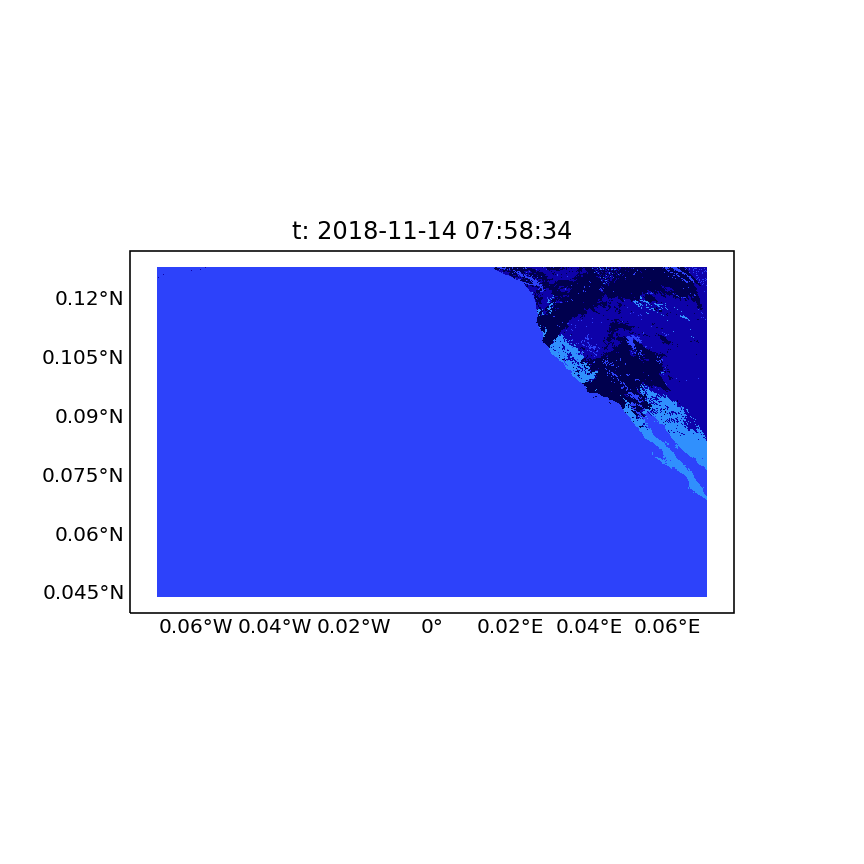
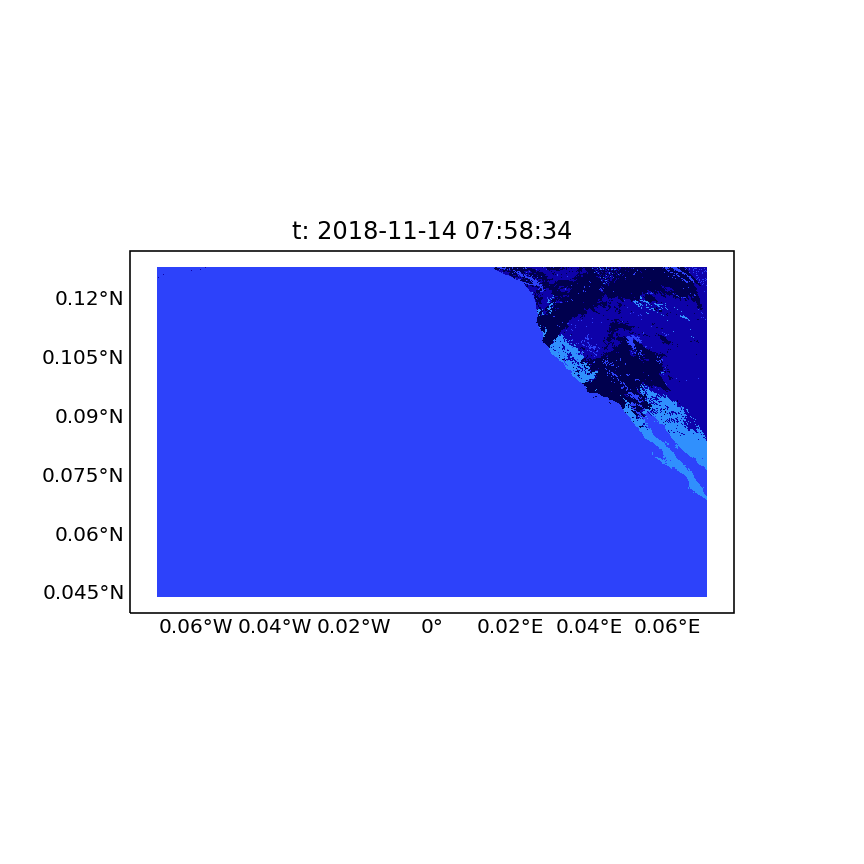
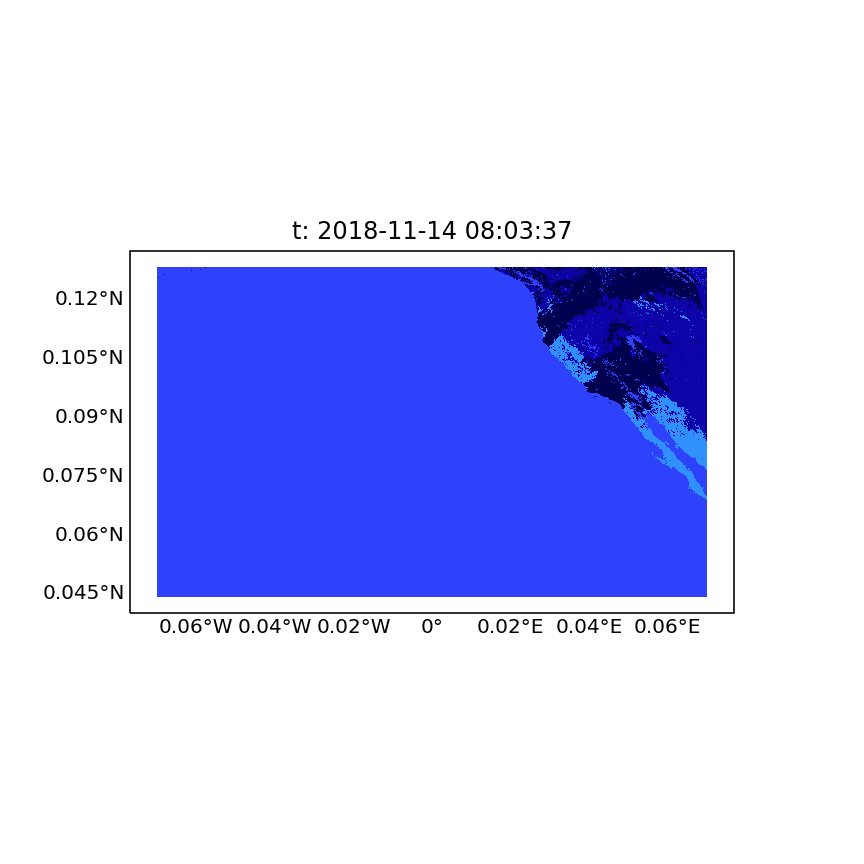
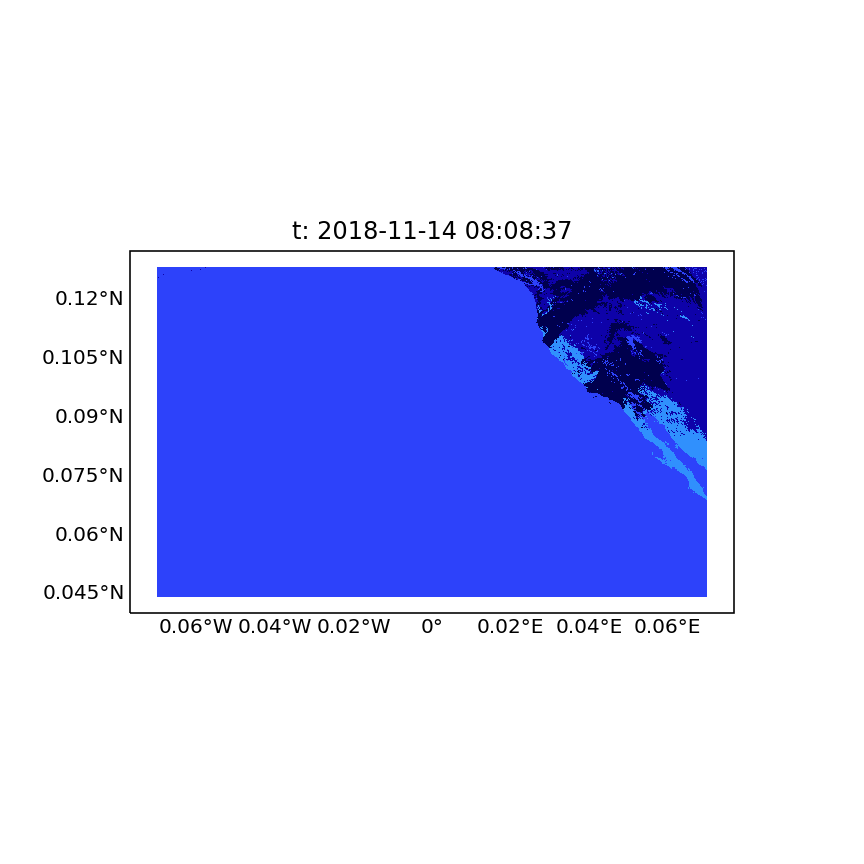
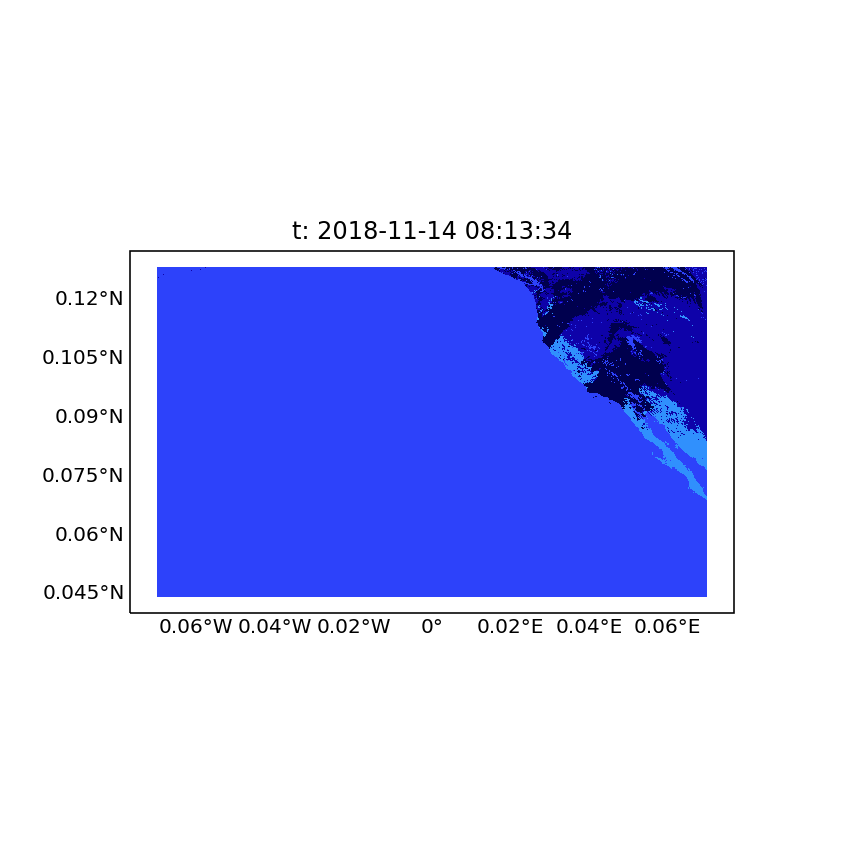
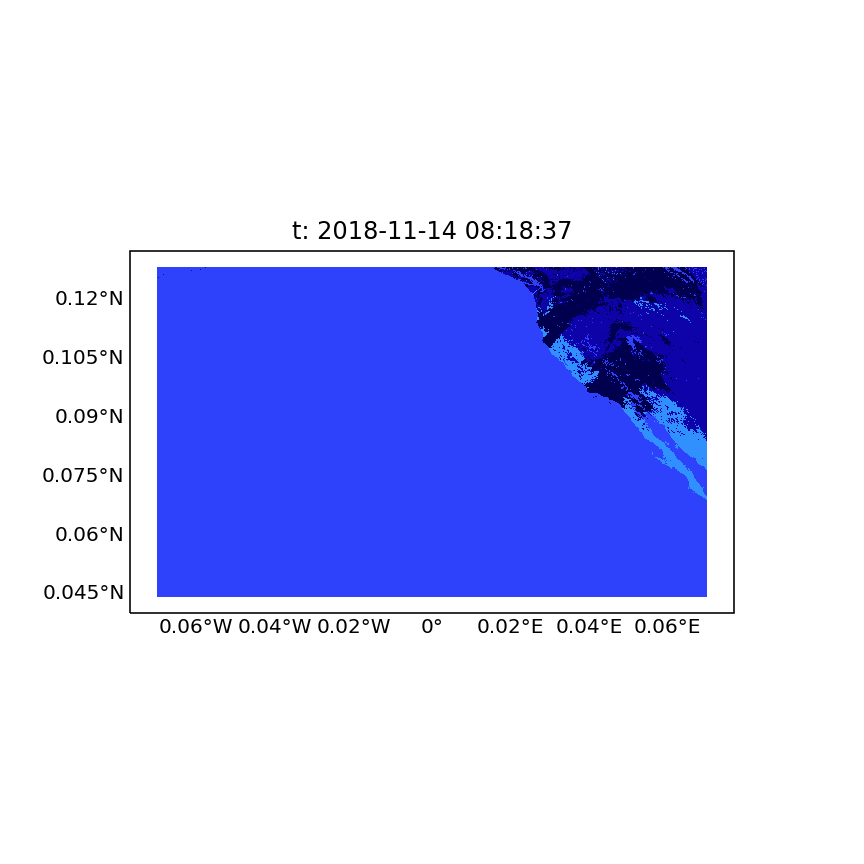
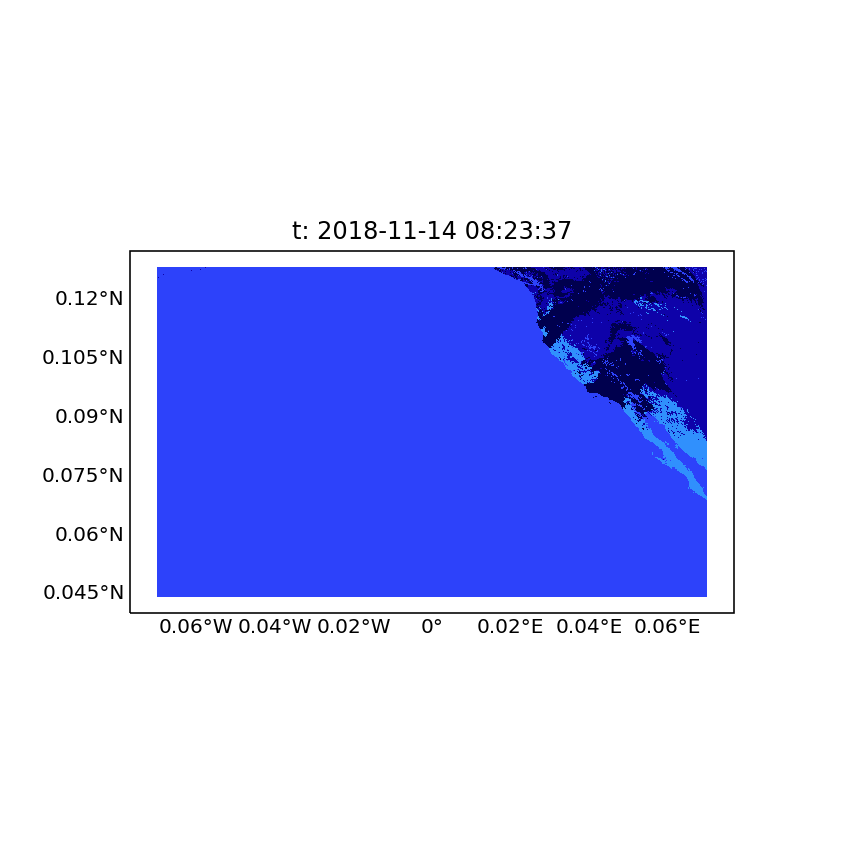
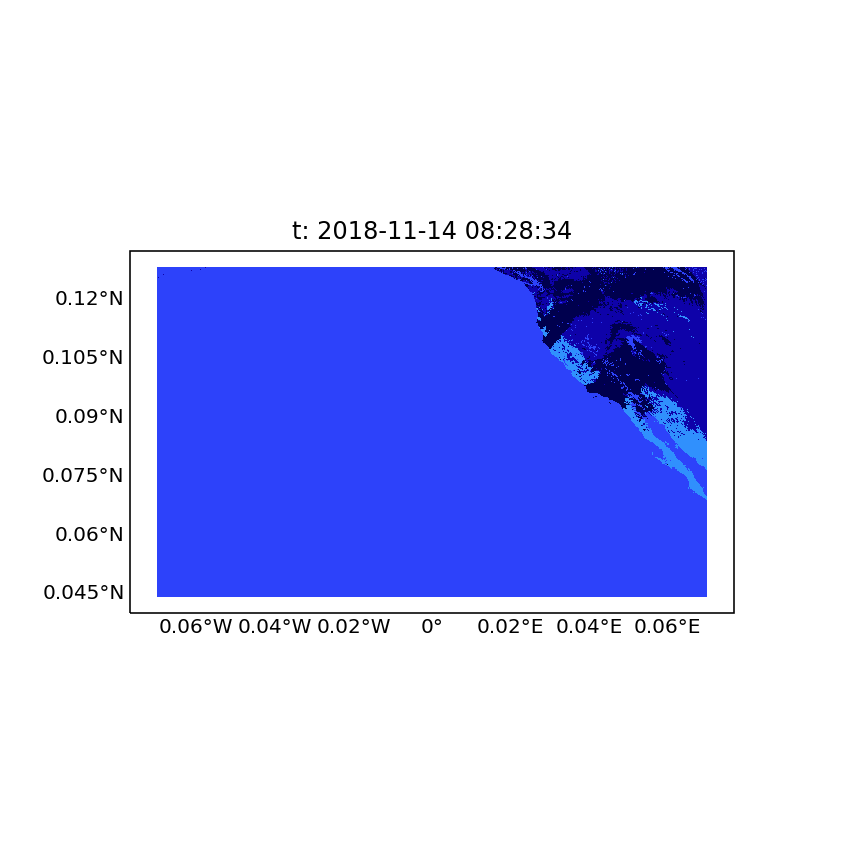
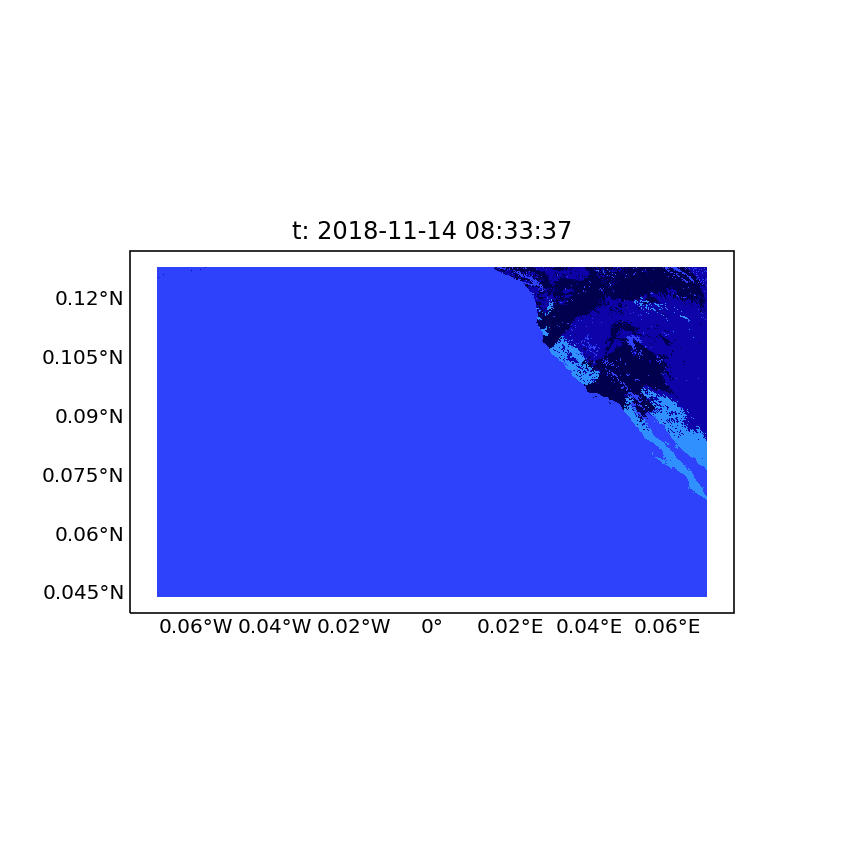
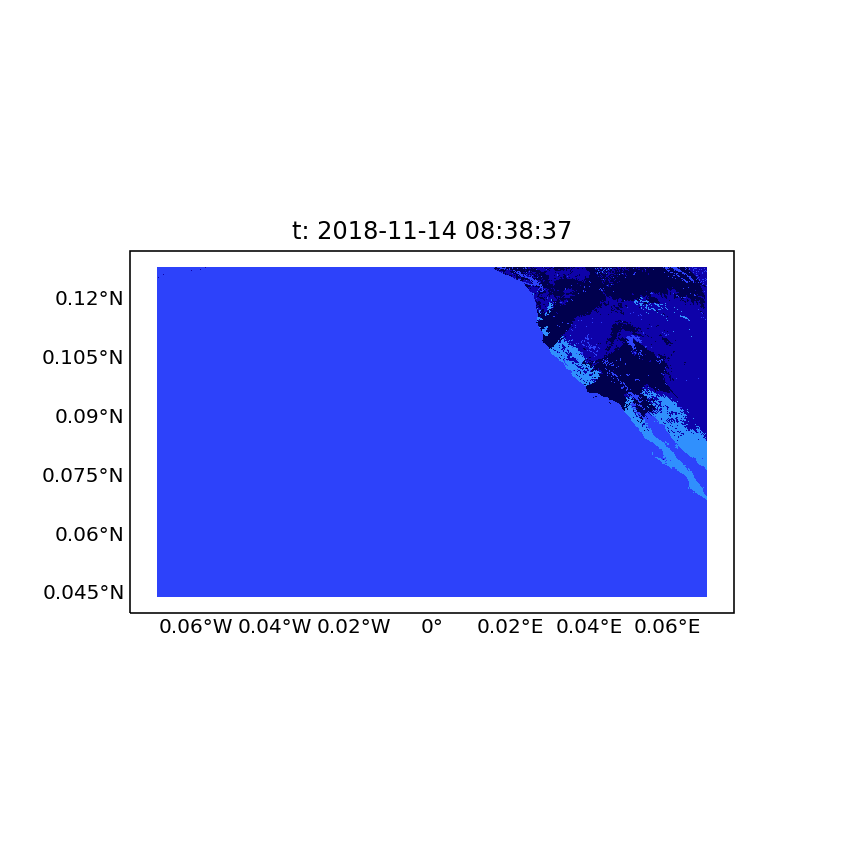
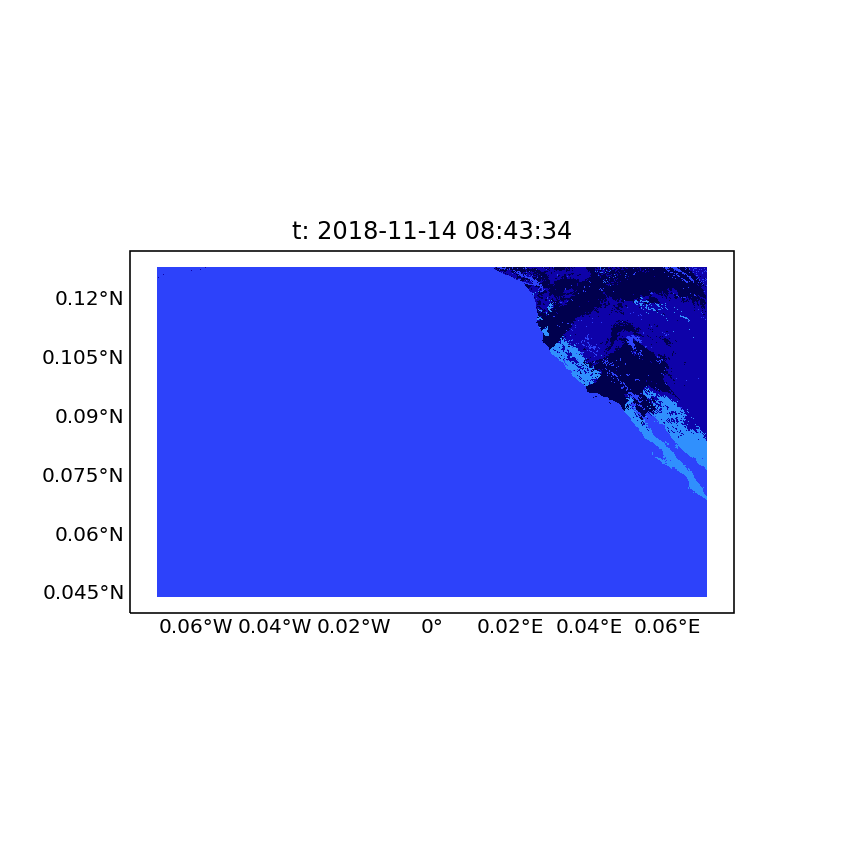

In [45]:
# To see part of the Camp Fire:
visualize_xarray(load_local_file_into_xarray(2018, 318, 8, local_filepaths), ['Mask'])

To see multiple hours or days of the fire, you can concatenate them and feed it into the visualizer:

In [1]:
#To see several consecutive hours:
fires = []
for i in range(5, 8):
    fires.append(load_local_file_into_xarray(2018, 318, i, local_filepaths))

visualize_xarray(xr.concat(fires, dim="time"), ['Mask'])

NameError: name 'load_local_file_into_xarray' is not defined

Note that these are very large data sets, and so trying to load weeks into memory will quickly crash

Next, we'll train an ML model on this data. I am going to first simply do binary classification o the entire image, whether or not the date is during the fire.

If I were to do binary classification for every pixel individiually, it would at core look very similar. Using a model without locally correlated information, you can take the 2 dimensional image and convert it into a single vector, aligning it with the similarly transformed binary pixels.

If the data does have locally correlated information, you want to use models that utilize that information, the canonical example being a convolutional neural net. In this case, you could use a U-Net with a binary loss function on each pixel, so that it directly creates the segmentation of each patch of images.

The data I'm going to gather here is a toy example: it's much smaller than what will get actual results. The purpose is just to show the outline of how this would be done, and would be expanded and systemtized for a product.

In [12]:
non_fire_day1 = 200
non_fire_day2 = 205
non_fire_uris = []

for i in range(non_fire_day1, non_fire_day2):
    non_fire_uris += (get_geo_uri(2019, i))
    
for key in non_fire_uris:
    local_filepaths.append(download_to_disk(key))

KeyboardInterrupt: 

In [ ]:
import dask_ml

Select subset of days from fire and non-fire for training and testing

In [58]:
local_filepaths

['ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171117219_e20183171119592_c20183171120130.nc',
 'ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171122219_e20183171124592_c20183171125124.nc',
 'ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171127219_e20183171129532_c20183171130055.nc',
 'ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171132219_e20183171134592_c20183171135119.nc',
 'ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171137219_e20183171139592_c20183171140125.nc',
 'ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171142219_e20183171144532_c20183171145059.nc',
 'ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171147219_e20183171149592_c20183171150122.nc',
 'ABI-L2-FDCC-2018-317-11-OR_ABI-L2-FDCC-M3_G17_s20183171152219_e20183171154592_c20183171155123.nc',
 'ABI-L2-FDCC-2018-317-12-OR_ABI-L2-FDCC-M3_G17_s20183171157219_e20183171159532_c20183171200054.nc',
 'ABI-L2-FDCC-2018-317-12-OR_ABI-L2-FDCC-M3_G17_s20183171202219_e20183171204592_c2018317120

In [59]:
def load_subset_of_data(year, day1, day2, y, data, labels):
    for i in range(day1, day2):
        for j in range(24):
            try:
                data.append(load_local_file_into_xarray(year, i, j, local_filepaths))
                labels.append(y)
            except:
                continue

In [66]:
train_data = []
train_labels = []
test_data = []
test_labels = []

load_subset_of_data(2019, non_fire_day1, non_fire_day1+2, 0, train_data, train_labels)
load_subset_of_data(2019, non_fire_day1+2, non_fire_day1+2, 0, test_data, test_labels)
load_subset_of_data(2018, 317, 318, 1, train_data, train_labels)
load_subset_of_data(2018, 318, 319, 1, test_data, test_labels)

For a toy example, let's just use the mean fire temperature

In [81]:
trainX, trainY = [], []

In [95]:
for data, label in zip(train_data, train_labels):
    print(data.mean_fire_area)

distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 3.02 GB -- Worker memory limit: 4.00 GB


<xarray.DataArray 'mean_fire_area' (time: 12)>
array([26271.4140625 , 39758.2890625 , 34748.38671875, 17884.97851562,
       41281.76953125, 36443.76953125, 41596.5078125 , 37608.4296875 ,
       42858.0859375 , 29056.40234375, 53272.2890625 , 46513.66796875])
Coordinates:
    t                   (time) datetime64[ns] 2019-07-19T00:02:38.365116928 ....
    y_image             float32 0.08624
    x_image             float32 0.0
    sunglint_angle      float32 10.0
    local_zenith_angle  float32 80.0
    solar_zenith_angle  float32 10.0
Dimensions without coordinates: time
Attributes:
    long_name:      mean fire area
    standard_name:  fire_area
    valid_range:    [   4000. 4000000.]
    units:          m2
    grid_mapping:   goes_imager_projection
    cell_methods:   sunglint_angle: sum (no pixel produced) local_zenith_angl...
<xarray.DataArray 'mean_fire_area' (time: 12)>
array([42203.47265625, 37820.19140625, 58419.8515625 , 35895.3359375 ,
       28980.25976562, 28260.53515625, 

distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 3.02 GB -- Worker memory limit: 4.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 3.02 GB -- Worker memory limit: 4.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 3.02 GB -- Worker memory limit: 4.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 3.02 GB -- Worker memory limit: 4.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 3.02 GB -- Worker memory limit: 4.00 GB
distributed.worker - WARN

In [20]:
from sklearn.linear_model import LogisticRegression

In [13]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='4GB')

Client Scheduler: inproc://192.168.99.39/87/1 Dashboard: http://192.168.99.39:8787/status,Cluster Workers: 1 Cores: 4 Memory: 4.00 GB


In [72]:
test_data[0].Mask.values.shape

(12, 1500, 2500)